# Visualize (If you can see it, you can believe it!)

### Library/Package imports

In [21]:
from pandasql import sqldf #!pip install -U pandasql
pysqldf = lambda q: sqldf(q, globals())
from collections import Counter
import pandas as pd #Pandas Lib
import numpy as np  #NumPy Lib
import matplotlib.pyplot as plt
import urllib.request, json 
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

### Import data from medicare

In [4]:
url = "https://data.medicare.gov/api/views/9n3s-kdb3/rows.csv?accessType=DOWNLOAD" 
life = pd.read_csv(url)
life.head(1)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,HIGHLANDS MEDICAL CENTER,10061,AL,READM-30-AMI-HRRP,Not Available,1.0,Not Available,Not Available,Not Available,Not Available,01-JUL-13,30-JUN-16


In [5]:
## convert to numeric
df = life
cols_to_convert = ['Predicted Readmission Rate', 'Expected Readmission Rate']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dtypes

## rename variables
df.rename(columns={'Predicted Readmission Rate': 'PRR', 'Expected Readmission Rate': 'ERR'}, inplace=True)


In [6]:
## subset columns for graphing (Predicted Vs. Actual RR)
data = pd.DataFrame(df, columns=['PRR', 'ERR'])

### Overlayed distributions
Smooth estimate of the distribution

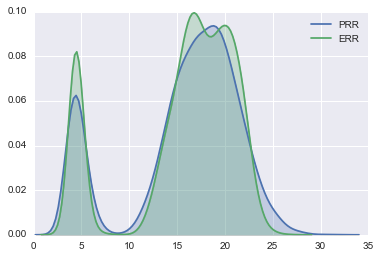

In [7]:
## Options
np.seterr(divide='ignore', invalid='ignore')

cols  = ['PRR', 'ERR']

for col in cols:
    sns.kdeplot(data[col], shade=True) 

### Histograms and KDE combined

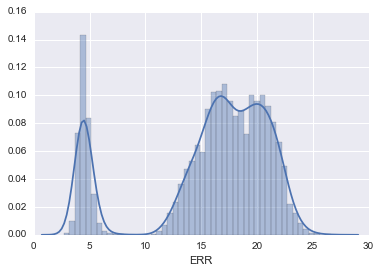

In [10]:
## Drop missing else you'll get errors
df_no_missing = data.dropna()
sns.distplot(df_no_missing['ERR']) 

### Marginal Distribution 
joinplot: using two or more vars 

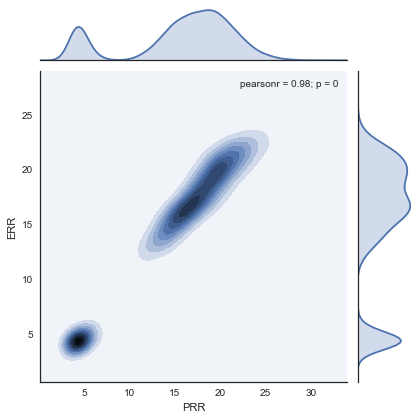

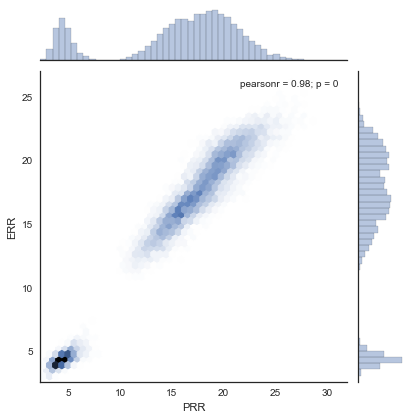

In [11]:
#Kernal Density plots of Predicted vs. Expected Readmission Rate 
with sns.axes_style('white'):
    sns.jointplot('PRR', 'ERR', data, kind='kde');
    
#Kernal Density plots of Predicted vs. Expected Readmission Rate 
with sns.axes_style('white'):
    sns.jointplot('PRR', 'ERR', data, kind='hex');

### Pair Plots

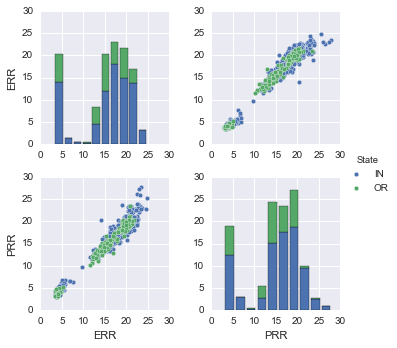

In [12]:
## Prepare data
#2 highly contrasted states in terms of their health
lst = ['IN','OR']
j= df[(df['State'].isin(lst) )]

## Keep only state and ERR
j1 = pd.DataFrame(j, columns=['State', 'ERR', 'PRR'])
## drop missing values:
j2 = j1.dropna()

#Paired Plots:
sns.pairplot(j2, hue='State', size=2.5);

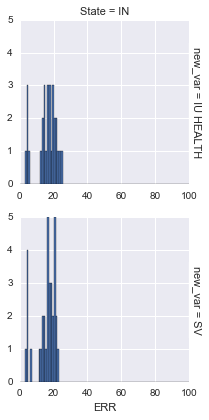

In [17]:
##contrast 2 hospital systems in IN who are competitors
x = df[((df['Hospital Name'].str.contains("INDIANA UNIVERSITY")) | (df['Hospital Name'].str.contains("ST VINCENT"))) 
       & (df['State'] == 'IN')]

def state_name (i):
    if "ST VINCENT" in i:
        return "SV"   
    if "INDIANA UNIVERSITY" in i:
        return "IU HEALTH"   

x1 = pd.DataFrame(data=x)
 
x1['new_var'] = x['Hospital Name'].apply(state_name).dropna()

grid = sns.FacetGrid(x1, row="new_var", col="State", margin_titles=True)
grid.map(plt.hist, "ERR",  bins=np.linspace(0, 100, 100));

### Graphical exploration with in-built data

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head(5)

**Box Plots** with axis limitations

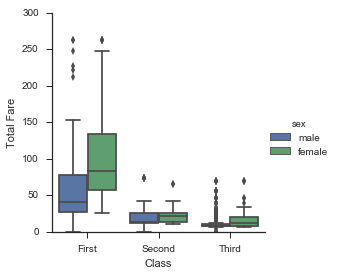

In [36]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("class", "fare", "sex", data=titanic, kind="box")
    g.set_axis_labels("Class", "Total Fare" )  
    g.set(ylim=(0, 300))

**Joint Distribution Plots Fare** and **Age**

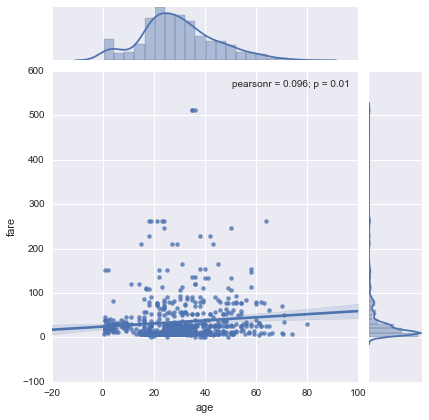

In [42]:
sns.jointplot( "age","fare", data=titanic, kind='reg')

**Violin plots**

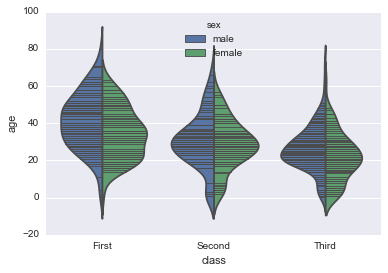

In [47]:
sns.violinplot(x="class",
               y="age", 
               hue="sex", 
               data=titanic,
               split=True, 
               inner="stick");